## Feature Selection with Information gain or Mutual information in Regression Problem Statements

#### Mutual Information 

* Mutual Information estimates mutual information for a continous target variable.

* Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. 

* If score is equal to zero then --> two random variables are independent.

* If score is higher value the -->  higher dependency.

* A quantity called mutual information measures the amount of information one can obtain from one random variable given another.


Formula ---> I(X ; Y) = H(X) – H(X | Y)

* here, I(X ; Y) is the mutual information for X and Y
* H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
housing_df = pd.read_csv('housing_data.csv')

In [3]:
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
housing_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
# picking only the numeric columns
numeric_lst = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(housing_df.select_dtypes(include=numeric_lst).columns)

In [7]:
numerical_cols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [8]:
housing_df = housing_df[numerical_cols]

In [9]:
housing_df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [10]:
# dropping the ID column
housing_df = housing_df.drop("Id", axis=1)

In [11]:
X = housing_df.drop(labels=['SalePrice'], axis =1)
y = housing_df['SalePrice']

## Train test Split

In [12]:
### It is always a good practice to split train and test data to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [13]:
X_train.isnull().sum()

MSSubClass         0
LotFrontage      189
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         5
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       54
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

# Applying the Mutual Information Regression

In [14]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.25576623, 0.20713785, 0.16435729, 0.5372869 , 0.10008829,
       0.34189569, 0.24065626, 0.09733599, 0.16325665, 0.01032807,
       0.11227576, 0.38375745, 0.31289762, 0.22686952, 0.        ,
       0.48377055, 0.02402734, 0.003908  , 0.28382343, 0.08395348,
       0.04019112, 0.01673517, 0.18523757, 0.18251789, 0.2650549 ,
       0.37766503, 0.36637611, 0.07426545, 0.17671329, 0.02041021,
       0.        , 0.03898597, 0.        , 0.        , 0.        ,
       0.00756154])

In [15]:
# sorting that values in decending order and mapping to column names
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

OverallQual      0.537287
GrLivArea        0.483771
TotalBsmtSF      0.383757
GarageCars       0.377665
GarageArea       0.366376
YearBuilt        0.341896
1stFlrSF         0.312898
FullBath         0.283823
GarageYrBlt      0.265055
MSSubClass       0.255766
YearRemodAdd     0.240656
2ndFlrSF         0.226870
LotFrontage      0.207138
TotRmsAbvGrd     0.185238
Fireplaces       0.182518
OpenPorchSF      0.176713
LotArea          0.164357
BsmtFinSF1       0.163257
BsmtUnfSF        0.112276
OverallCond      0.100088
MasVnrArea       0.097336
HalfBath         0.083953
WoodDeckSF       0.074265
BedroomAbvGr     0.040191
ScreenPorch      0.038986
BsmtFullBath     0.024027
EnclosedPorch    0.020410
KitchenAbvGr     0.016735
BsmtFinSF2       0.010328
YrSold           0.007562
BsmtHalfBath     0.003908
LowQualFinSF     0.000000
3SsnPorch        0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
dtype: float64

<AxesSubplot:>

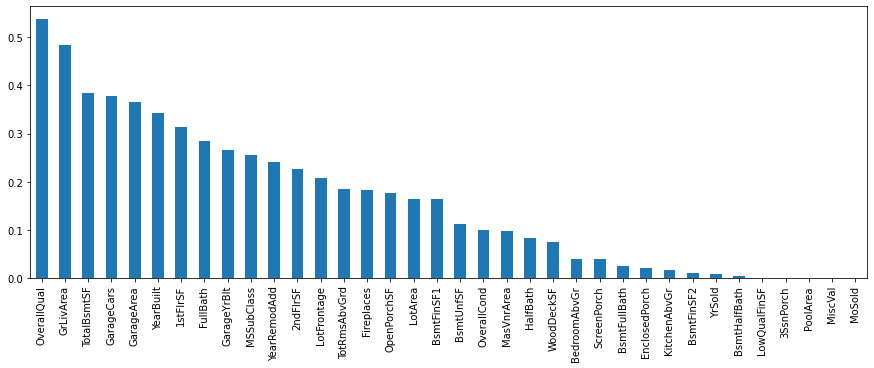

In [16]:
# plotting that values in graph
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

## We will select the  top 5 important features manually also or by using SelectKBest module

* we can select the top 5 or 10 or 20 important features 
* or we can select the top 10 or 20 percentile features

In [17]:
## Selecting the top 20 percentile
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectPercentile


selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train.fillna(0), y_train)

SelectPercentile(percentile=20,
                 score_func=<function mutual_info_regression at 0x000002461E247DC0>)

In [18]:
selected_top_columns.get_support()

array([False, False, False,  True, False,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False])

In [19]:
X_train.columns[selected_top_columns.get_support()]

Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')

## Conclusion:
    
By using this algorithm we can coclude that the above 7 columns are having high mutual information or information gain with the target

To learn more about about Mutual information for classification use this link : https://scikitlearn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html